In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
## Remove missing values (not recommended - imputing is preferred)
df.dropna(inplace = True)

In [3]:
## X Matrix and y vector
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

In [4]:
## Split the data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 591)

## **Logistic Regression Model**

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [8]:
## Predictions
yhat_lr = lr.predict(X_test)

In [12]:
## Propensities
phat_lr = lr.predict_proba(X_test)[:,1]

## **Random Forest Model**

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
## Predictions
yhat_rf = rf.predict(X_test)

In [20]:
## Propensities
phat_rf = rf.predict_proba(X_test)[:,1]

## **ROC Curve Plot**

In [13]:
## import modules
from sklearn.metrics import auc, roc_curve

In [21]:
## Get TPR, FPR and Thresholds for EACH model
fpr1, tpr1, thresh1 = roc_curve(y_test, phat_lr)
fpr2, tpr2, thresh2 = roc_curve(y_test, phat_rf)

In [22]:
## Get AUCs for EACH model
AUC_val1 = auc(fpr1, tpr1)
AUC_val2 = auc(fpr2, tpr2)

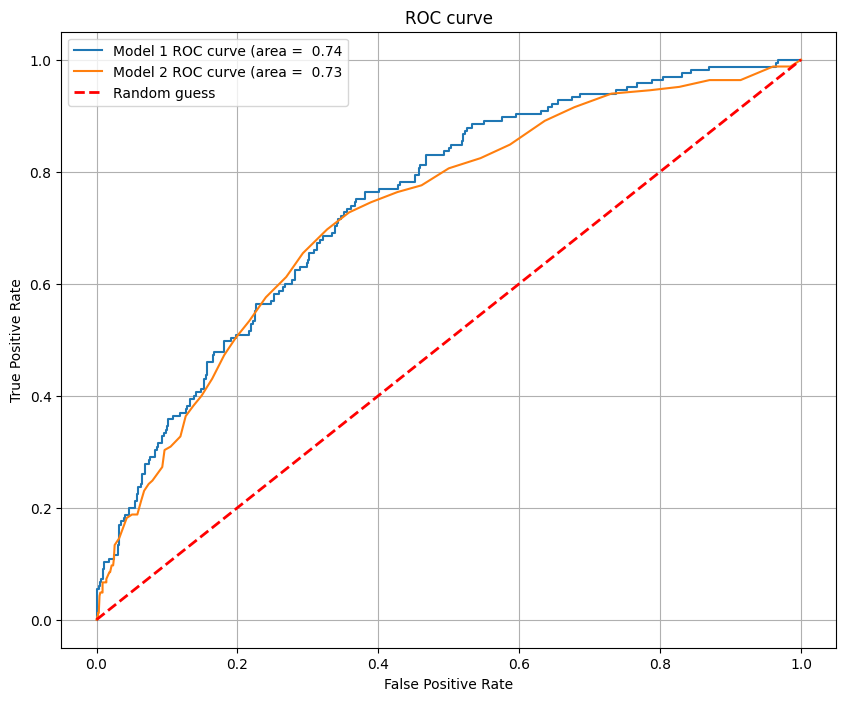

In [23]:
## Plot ROC Curves with AUCs for EACH model
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(fpr1, tpr1, label= f'Model 1 ROC curve (area = {AUC_val1: 0.2f}')
plt.plot(fpr2, tpr2, label= f'Model 2 ROC curve (area = {AUC_val2: 0.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()